<a href="https://colab.research.google.com/github/Amjadkp/python-lab-cycle-1/blob/main/Labcycle3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

c3q1

In [ ]:
"""Develop a two-player tic-tac-toe game using pygame"""

from itertools import count
from timeit import repeat
import pygame,sys
import numpy as np

pygame.init()

WIDTH=600
HEIGHT=800
LINE_WIDTH=25
WINDOW_COL=1
WINDOW_ROW=4
BOARD_ROWS = 3
BOARD_COLS = 3
CIRCLE_RADIUS = 50
CIRCLE_WIDTH = 10
CROSS_WIDTH = 15
SPACE = 55
RED = (255,0,0)
CIRCLE_COLOUR = (120,120,120)
LINE_COLOUR=(232,232,232)
BG_COLOUR=(200,200,200)

screen=pygame.display.set_mode((WIDTH,HEIGHT))
pygame.display.set_caption('TIC TAC TOE')
screen.fill( BG_COLOUR )

board = np.zeros((BOARD_ROWS,BOARD_COLS))
window=np.zeros((WINDOW_ROW,WINDOW_COL))
global win

def draw_lines():
   #horizontal
    pygame.draw.line(screen, LINE_COLOUR, (20,200), (580,200),LINE_WIDTH )
    pygame.draw.line(screen, LINE_COLOUR, (20,400), (580,400),LINE_WIDTH )
   #vertical
    pygame.draw.line(screen, LINE_COLOUR, (200,15), (200,590),LINE_WIDTH )
    pygame.draw.line(screen, LINE_COLOUR, (400,15), (400,590),LINE_WIDTH )
   #borders
    pygame.draw.line(screen, LINE_COLOUR, (0,10), (600,10),25)
    pygame.draw.line(screen, LINE_COLOUR, (10,0), (10,600),25 )

    pygame.draw.line(screen, LINE_COLOUR, (590,10), (590,600),25)
    pygame.draw.line(screen, LINE_COLOUR, (0,600), (600,600),25)
    rec=pygame.draw.rect(screen, CIRCLE_COLOUR, pygame.Rect(50, 650, 200, 100))
    font = pygame.font.SysFont('Arial', 35)
    screen.blit(font.render('Restart', True, (0,0,0)), ((85,685) ))
    pygame.display.update()

def draw_figures():
    for row in range(BOARD_ROWS):
        for col in range(BOARD_COLS):
            if board[row][col] == 1:
                pygame.draw.circle( screen,CIRCLE_COLOUR,(int( col*200+100),int(row*200+110)),CIRCLE_RADIUS,CIRCLE_WIDTH)
            elif board[row][col] == 2:
                pygame.draw.line( screen,CIRCLE_COLOUR,(col*200+SPACE,row*200+200-SPACE),(col*200+200-SPACE,row*200+SPACE),CROSS_WIDTH)
                pygame.draw.line( screen,CIRCLE_COLOUR,(col*200+SPACE,row*200+SPACE),(col*200+200-SPACE,row*200+200-SPACE),CROSS_WIDTH)


def mark_square(row,col,player):
    board[row][col] = player

def available_square(row,col):
    #print(board[row][col])
    if board[row][col] == 0:
        return True
    else:
        return False

def is_board_full():
    for row in range(BOARD_ROWS):
        for col in range(BOARD_COLS):
            if board[row][col] == 0:
                return False
    #status()
    return True

def check_win(player):
    #vertical check
    for col in range(BOARD_COLS):
        if board[0][col] == player and board[1][col] == player and board[2][col] == player:
            draw_vertical_winning_line(col,player)
            return True

    #horizontal check
    for row in range(BOARD_ROWS):
        if board[row][0] == player and board[row][1] == player and board[row][2] == player:
            draw_horizontal_winning_line(row,player)
            return True

    #asc diagonla check
    if board[2][0] == player and board[1][1] == player and board[0][2] == player:
        draw_asc_diagonal(player)
        return True

    #desc Diagonal check
    if board[0][0] == player and board[1][1] == player and board[2][2] == player:
        draw_desc_diagonal(player)
        return True

    return False


def draw_vertical_winning_line(col,player):
    posX = col * 200 + 100
    
    if player == 1:
        colour = RED
        print("O WINS")
    elif player == 2:
        colour = RED
        print("X WINS")
    win=1
    pygame.draw.line(screen, CIRCLE_COLOUR,(posX,35),(posX,600-30),10)
    

def draw_horizontal_winning_line(row,player):
    posY = row * 200 + 100

    if player == 1:
        print("O WINS")
    elif player == 2:
        print("X WINS")
    win=1

    pygame.draw.line(screen,CIRCLE_COLOUR,(35,posY),(600-30,posY),10)



def draw_asc_diagonal(player):
    if player == 1:
        print("O WINS")
    elif player == 2:
        print("X WINS")
    pygame.draw.line(screen,CIRCLE_COLOUR,(35,600-35),(600-35,35),10)
    win=1

def draw_desc_diagonal(player):
    if player == 1:
       print("O WINS")
    elif player == 2:
       print("X WINS")
    pygame.draw.line(screen,CIRCLE_COLOUR,(35,35),(600-35,600-35),10)
    win=1

def status():
    if win == "X":
        print("X WINS")
    elif win == "O":
        print("O WINS")
    


def check_outside(row,col):
    if  (row>=50 and row<=250)and (col>=650 and col<=750):
        #print("Entered2")
        return True
    else:
        return False

def restart():
    screen.fill( BG_COLOUR)
    draw_lines()
    player = 1
    for row in range(BOARD_ROWS):
        for col in range(BOARD_COLS): 
            board[row][col] = 0

draw_lines()



player = 1
win=0
game_over = False



mouseX = 0
mouseY = 0
count = 0
while True:
    for event in pygame.event.get():
    

        if event.type == pygame.MOUSEBUTTONDOWN and not game_over:

            mouseX = event.pos[0]
            mouseY = event.pos[1]

            clicked_row = int(mouseY //200)
            clicked_col = int(mouseX // 200)
            #print(clicked_row)
            #print(WINDOW_ROW)
            #print(clicked_row  != WINDOW_ROW-1)

           
            if clicked_row  != WINDOW_ROW-1:
                if available_square(clicked_row,clicked_col):
               
                    if player == 1:
                        mark_square( clicked_row,clicked_col,1)
                        if check_win(player):
                            game_over = True
                        player = 2
                    elif player ==2:
                        mark_square( clicked_row,clicked_col,2)
                        if check_win(player):
                            game_over = True
                        player = 1

                    draw_figures()
                    if game_over == True and count == 0:
                        status()
                 
                
            elif event.type == pygame.MOUSEBUTTONDOWN :
                #print("Entered")
                #print(mouseX," ",mouseY)
                if check_outside(mouseX,mouseY):
                    #print("Get restart")
                    restart()
                    game_over=False

       
        pygame.display.update()

        if event.type == pygame.KEYDOWN:
            if event.key == pygame.K_r:
                restart()
                game_over = False
        
        if event.type == pygame.QUIT:
            sys.exit()
        
          

    pygame.display.update()

c3q2

In [25]:
# 2.Implement Principle Component Analysis(PCA) of a matrix.

import numpy as np
import numpy.linalg as nl

# function to input a matrix
def input_matrix():

  matrix = []
  # taking number of rows
  row = int(input("Enter the number of rows    : "))  
   # taking number of columns 
  col = int(input("Enter the number of columns : "))  
  print(" ")
  
  print("Enter the elements of the matrix : ")
  print(" ")
  
  # nested loop to input a matrix
  for i in range(row):                     
    m = []
    for j in range(col):
      print("Enter m[",i+1,j+1,"] ")
      m.append(float(input()))  
      print(" ")                          
    matrix.append(m)                                   
  return(matrix,row,col)                                
  # returning the matrix, number of 
  # rows and columns  

# function to display the matrix
def output_matrix(matrix,row,col):
  print(" ")
  print("MATRIX : ")
  for i in range(row):
    for j in range(col):
      print(matrix[i][j],end="  ")
    print(" ")
  print(" ")

# function to calculate PCA
def calculate_PCA(matrix):
  Array = np.array(matrix)
  A = np.array([[1, 2], [3, 4], [5, 6]])
  print(A)
  M2 = np.mean(A, axis=0)
  print(M2)
  Mean = np.mean(Array.T, axis=1)
  print("Mean of each column : ")
  print(Mean)
  print(" ")
  
  # centering columns by subtracting column means
  Center = Array - Mean                    
  print("Centered matrix : ")
  print(Center)
  print(" ")

  # calculate covariance matrix of centered matrix
  Varience = np.cov(Center.T)               
  print("Covariance Matrix : ")
  print(Varience)
  print(" ")

  # generating Eigen vectors
  e_values, e_vectors = nl.eig(Varience)    
  print("Eigen vectors : ")
  print(e_vectors)
  print(" ")

  # generating Eigen values
  print("Eigen values  : ",e_values)        
  Proj = e_vectors.T.dot(Center.T)
  print(" ")

  # printing projection of matrix
  print("Projection of original matrix : ") 
  print(Proj.T)
  print(" ")

# calling functions to perform PCA
print("Program to perform implement principle component analysis ")
print(" ")
matrix,row,col=input_matrix()
output_matrix(matrix,row,col)
calculate_PCA(matrix)

Program to perform implement principle component analysis 
 
Enter the number of rows    : 2
Enter the number of columns : 2
 
Enter the elements of the matrix : 
 
Enter m[ 1 1 ] 
1
 
Enter m[ 1 2 ] 
2
 
Enter m[ 2 1 ] 
1
 
Enter m[ 2 2 ] 
1
 
 
MATRIX : 
1.0  2.0   
1.0  1.0   
 
[[1 2]
 [3 4]
 [5 6]]
[3. 4.]
Mean of each column : 
[1.  1.5]
 
Centered matrix : 
[[ 0.   0.5]
 [ 0.  -0.5]]
 
Covariance Matrix : 
[[0.  0. ]
 [0.  0.5]]
 
Eigen vectors : 
[[1. 0.]
 [0. 1.]]
 
Eigen values  :  [0.  0.5]
 
Projection of original matrix : 
[[ 0.   0.5]
 [ 0.  -0.5]]
 


q3

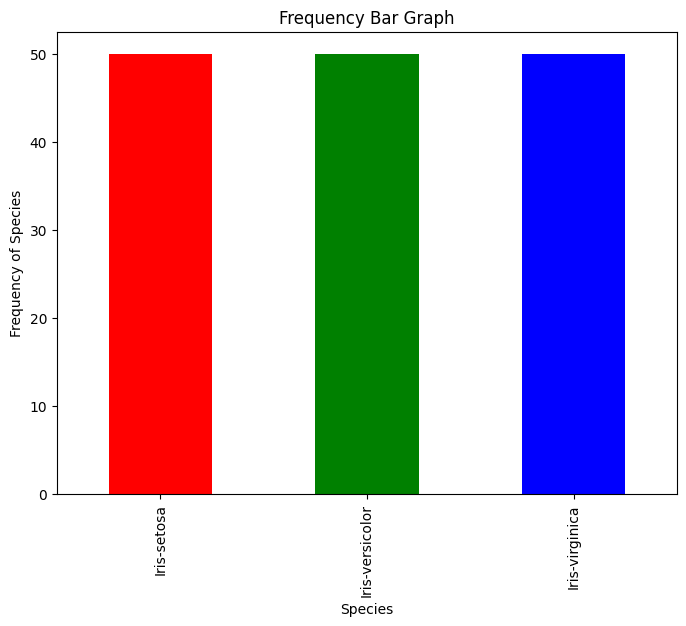


PCA Graph


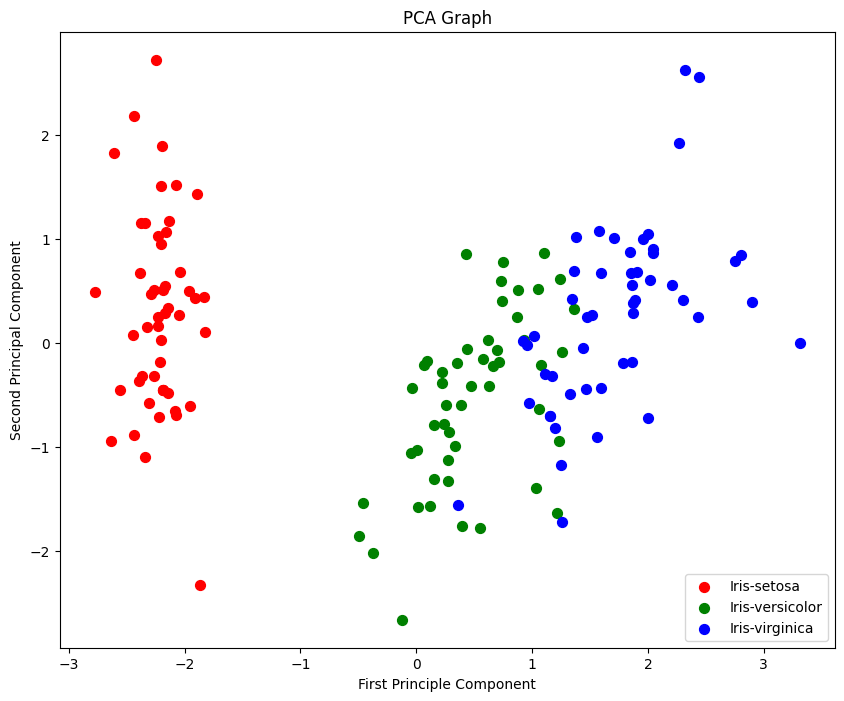


Distribution Histogram



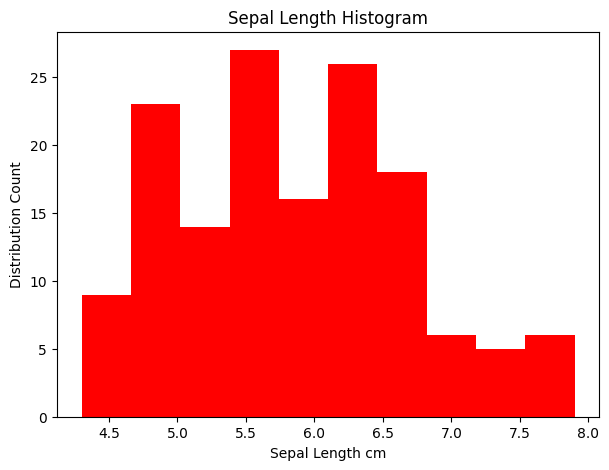

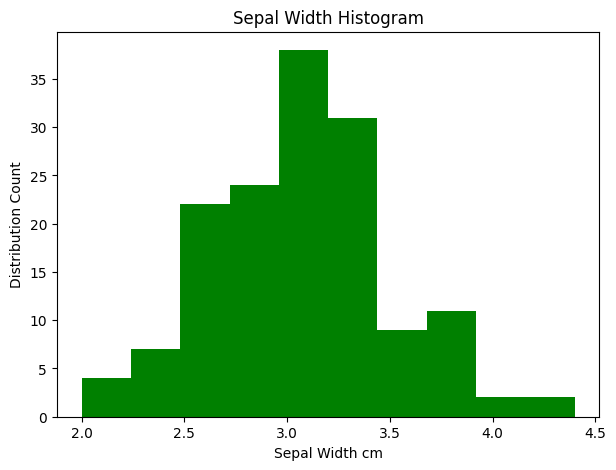

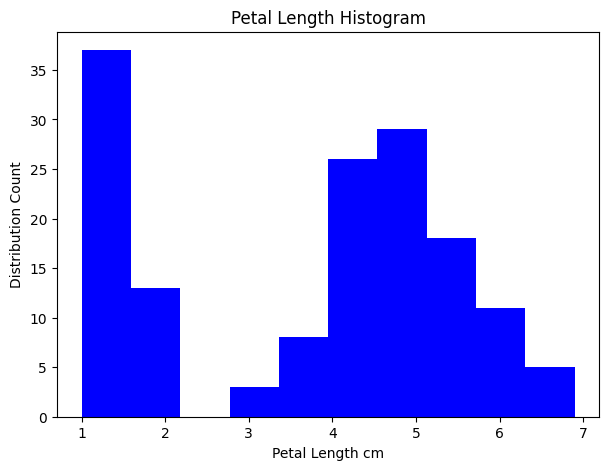

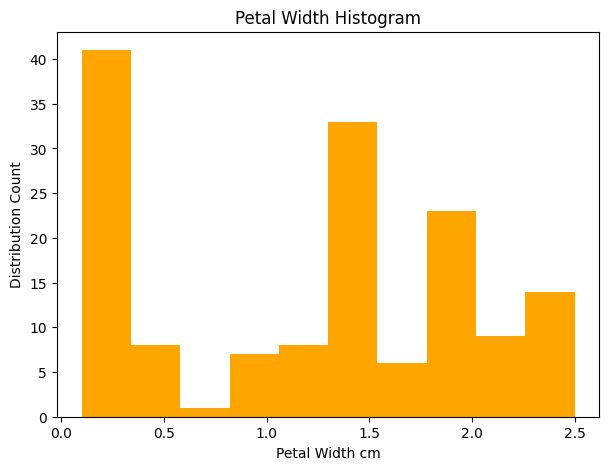

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
# %matplotlib inline

#reading the csv file into df.
df = pd.read_csv ('iris.csv')

def frequency_species():
  #ploting the bar chart according to the frequency of species.
  df.Species.value_counts().plot(figsize=(8,6),kind='bar',color=['r','g','b'],
  xlabel='Species',ylabel='Frequency of Species')
  plt.title("Frequency Bar Graph")
  plt.show()

def PCA_Graph():
  print("\nPCA Graph")
  #plotting the principal analysis graph for two components
  X = df.iloc[:, 1:5].values
  X_std = StandardScaler().fit_transform(X)
  pca = PCA(n_components=2)
  principalComponents = pca.fit_transform(X_std)
  principalDf = pd.DataFrame(data = principalComponents
              , columns = ['principal component 1', 'principal component 2'])
  finalDf = pd.concat([principalDf, df['Species']], axis = 1)

  fig = plt.figure(figsize = (10,8))
  ax = fig.add_subplot(1,1,1)
  ax.set_xlabel('First Principle Component')
  ax.set_ylabel('Second Principal Component')
  ax.set_title('PCA Graph')
  targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
  colors =      ['r', 'g', 'b']
  for target, color in zip(targets,colors):
      indicesToKeep = finalDf['Species'] == target
      ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
                , finalDf.loc[indicesToKeep, 'principal component 2']
                , c = color
                , s = 50)
  ax.legend(targets)
  plt.show()

def sepal_distribution():
  print("\nDistribution Histogram\n")
  #histogram for sepal length.
  plt.figure(figsize = (7, 5))
  x = df.SepalLengthCm
  plt.hist(x, color = "r")
  plt.title("Sepal Length Histogram")
  plt.xlabel("Sepal Length cm")
  plt.ylabel("Distribution Count")
  plt.show()

  print()
  #histogram for sepal width.
  plt.figure(figsize = (7, 5))
  x = df.SepalWidthCm
  plt.hist(x, color = "g")
  plt.title("Sepal Width Histogram")
  plt.xlabel("Sepal Width cm")
  plt.ylabel("Distribution Count")
  plt.show()

def petal_distribution():
  print()
  #histogram for petal length.
  plt.figure(figsize = (7, 5))
  x = df.PetalLengthCm
  plt.hist(x, color = "b")
  plt.title("Petal Length Histogram")
  plt.xlabel("Petal Length cm")
  plt.ylabel("Distribution Count")
  plt.show()

  print()
  #histogram for petal width.
  plt.figure(figsize = (7, 5))
  x = df.PetalWidthCm
  plt.hist(x, color = "orange")
  plt.title("Petal Width Histogram")
  plt.xlabel("Petal Width cm")
  plt.ylabel("Distribution Count")
  plt.show()

#invoking the function to display graph.
frequency_species()
PCA_Graph()
sepal_distribution()
petal_distribution()

c3q4


In [ ]:
"""python3.4.ipynb

Automatically generated by Colaboratory.

Original file is located at
    https://colab.research.google.com/drive/1A3CHKevjqBVA9mUrv9-71EXhFGRdJEzJ
"""

import pickle,tabulate
class vehicleAttributes:
  
  _keyList = ["id","ownerName","vendor","model","type","registrationNumber",
              "engineNumber","mileage"]
  
  _dataBase = dict.fromkeys(_keyList, None)

class Vehicles(vehicleAttributes):
  
  __listOfVehicles = list()
  __id = 0
  def addEntries(self):
    option = 1
    while option==1:
      self.__id = self.__id + 1
      entryList = list()
      entryList.append(self.__id)
      entryList.append(input("Owner Name : "))
      entryList.append(input("Vendor Name : "))
      entryList.append(input("Model Name : "))
      entryList.append(input("Type : "))
      entryList.append(int(input("Registration Number : ")))
      entryList.append(int(input("Engine Number : ")))
      entryList.append(float(input("Mileage : ")))
      
      for i,key in zip(entryList,self._dataBase):
        self._dataBase[key] = i
      self.__listOfVehicles.append(self._dataBase.copy())
      option = int(input("Do you want to add more entries\n1.Add\n2.Exit\n"))

  def deleteEntries(self):
    found = False
    searchKey = int(input("Enter your ID : "))
    for i in range(len(self.__listOfVehicles)):
      if self.__listOfVehicles[i]['id']==searchKey:
        found = True
        del self.__listOfVehicles[i]
        break
    if(not found):
      print("Invalid Id")
  
  def modifyEntries(self):
    found = False
    searchKey = int(input("Enter your ID : "))
    for i in self.__listOfVehicles:
      if i['id']==searchKey:
        found = True
        print("Choose the attribute you want to change")
        print("1.Owner Name\n2.Vendor Name\n3.Model Name")
        print("4.Type\n5.Registration Number\n6.Engine Number")
        print("7.Mileage")
        option = int(input())
        if option==1:
          i['ownerName'] = input("Owner Name : ")
        elif option==2:
          i['vendor'] = input("Vendor Name : ")
        elif option==3:
          i['model'] = input("Model Name : ")   
        elif option==4:
          i['type'] = input("Type : ")
        elif option==5:
          i['registrationNumber'] = int(input("Registration Number : "))    
        elif option==6:
          i['engineNumber'] = int(input("Engine Number : "))
        elif option==7:
          i['mileage'] = float(input("Mileage : "))
    if(not found):
      print("Invalid Key")

  def display(self,*args):
    header = ['Id','Owner','Vendor','Model','Type','Registration Number',
              'Engine Number','Mileage']
    if(len(args)==0):
      rows =  [x.values() for x in self.__listOfVehicles]
      print(tabulate.tabulate(rows, header,tablefmt='grid'))
    elif (len(args)==2):
      print("\n",args[0])
      rows = [x.values() for x in args[1]]
      print(tabulate.tabulate(rows, header,tablefmt='grid'))

  def sortMileage(self):
    sortedList = sorted(self.__listOfVehicles,key = lambda i:i['mileage'])
    self.display("Mileage Sorted List",sortedList)

  def createFile(self):
    pickle.dump(self.__listOfVehicles,open("vehicleDetails.pkl","wb"))

  def filterAttributes(self):
    print("Choose the attribute which you want to filter\n1.Owner Name")
    print("2.Vendor\n3.Model Name\n4.Type\n5.Mileage")
    option = int(input("Option : "))
    filteredList = list()
    if(option==1):
      filterKey = (input("Enter the name you want to filter"))
      filteredList = [i for i in self.__listOfVehicles if i['ownerName']== filterKey]
      self.display("Filtered List",filteredList)
    elif (option==2):
      filterKey = (input("Enter the name you want to filter"))
      filteredList = [i for i in self.__listOfVehicles if i['vendor']== filterKey]
      self.display("Filtered List",filteredList)
    elif (option==3):
      filterKey = (input("Enter the name you want to filter"))
      filteredList = [i for i in self.__listOfVehicles if i['model']== filterKey]
      self.display("Filtered List",filteredList)
    elif (option==4):
      filterKey = (input("Enter the name you want to filter"))
      filteredList = [i for i in self.__listOfVehicles if i['type']== filterKey]
      self.display("Filtered List",filteredList)
    elif(option==5):
      filterKey = float(input("Enter the name you want to filter"))
      filteredList = [i for i in self.__listOfVehicles if i['mileage']== filterKey]
      self.display("Filtered List",filteredList)
  def loadFile(self,filePath):
    self.__listOfVehicles = pickle.load(open(filePath,"rb"))
    idList = [self.__listOfVehicles[i]['id'] for i in range(len(self.__listOfVehicles))]
    self.__id = max(idList)

def main():
  vehicleObject = Vehicles()
  if(int(input("1.Add Entries\n2.Load Pickle\n"))==1):
    vehicleObject.addEntries()  
  else:
    filePath = input("Enter the file name : ")
    vehicleObject.loadFile(filePath)
  vehicleObject.display()
  mainLoopOption=1
  while mainLoopOption==1:
    print("1.Add Entries\n2.Modify Attributes\n
    3.Delete Attributes\n4.Display Entries")
    print("5.Sort According to Mileage\n
    6.Filter Attributes\n7.Create Pickle File\n8.Exit")
    choice = int(input())
    if choice==1:
      vehicleObject.addEntries()
    elif choice==2:
      vehicleObject.modifyEntries()
    elif choice==3:
      vehicleObject.deleteEntries()
    elif choice==4:
      vehicleObject.display()
    elif choice==5:
      vehicleObject.sortMileage()
    elif choice==6:
      vehicleObject.filterAttributes()
    elif choice==7:
      vehicleObject.createFile()
    elif choice==8:
      break
  mainLoopOption = int(input("\n1.Continue\n2.Exit"))

if __name__=="__main__":
  main()

1.Add Entries
2.Load Pickle
1
Owner Name : amjad
Vendor Name : volkswagen
Model Name : polo gt
Type : hatch
Registration Number : 4587
Engine Number : 4565
Mileage : 20
Do you want to add more entries
1.Add
2.Exit
1
Owner Name : asitha
Vendor Name : honda
Model Name : city
Type : hatch
Registration Number : 3764
Engine Number : 3443
Mileage : 22
Do you want to add more entries
1.Add
2.Exit
2
+------+---------+------------+---------+--------+-----------------------+-----------------+-----------+
|   Id | Owner   | Vendor     | Model   | Type   |   Registration Number |   Engine Number |   Mileage |
+======+=========+============+=========+========+=======================+=================+===========+
|    1 | amjad   | volkswagen | polo gt | hatch  |                  4587 |            4565 |        20 |
+------+---------+------------+---------+--------+-----------------------+-----------------+-----------+
|    2 | asitha  | honda      | city    | hatch  |                  3764 |      

c3q5

In [ ]:
from tkinter import *
from tkinter.filedialog import askopenfilename,asksaveasfile
from tkinter.messagebox import showinfo
from tkinter.ttk import Style, Treeview
import pickle

global listOfVehicles
global sortedList
listOfVehicles = list()
vehicle_attributes = ["ownerName","vendor","model","type",
                      "registrationNumber","engineNumber","mileage"]
vehicleDetails = dict.fromkeys(vehicle_attributes, None)

def addList():
    global listOfVehicles
    treeList.insert(parent='', index='end', text="",
    values=(owner.get(), vendor.get(),
    model.get(),typeClass.get(),regNumber.get(),
    engNumber.get(),mileage.get()))
    vehicleDetails['ownerName'] = owner.get()
    vehicleDetails['vendor'] = vendor.get()
    vehicleDetails['model'] = model.get()
    vehicleDetails['type'] = typeClass.get()
    vehicleDetails['registrationNumber'] = int(regNumber.get())
    vehicleDetails['engineNumber'] = int(engNumber.get())
    vehicleDetails['mileage'] = float(mileage.get())
    listOfVehicles.append(vehicleDetails.copy())

def filterList():
    global listOfVehicles
    if(owner.get()!="" or vendor.get()!="" or model.get()!="" or
       typeClass.get()!="" or mileage.get()!=""):
        for item in treeList.get_children():
            treeList.delete(item)
    else:
        showinfo(title="Error",message="Give a Filter Key")
    if(owner.get()!=""):
        filterKey = owner.get()
        for i in listOfVehicles:
            if i['ownerName']==filterKey:
                treeList.insert(parent='', index='end',
                                text="", values=(i['ownerName'],
                i['vendor'],i['model'],i['type'],i['registrationNumber'],
                i['engineNumber'],i['mileage']))
    elif (vendor.get()!=""):
        filterKey = vendor.get()
        for i in listOfVehicles:
            if i['vendor']==filterKey:
                treeList.insert(parent='', index='end',
                                text="", values=(i['ownerName'],
                i['vendor'],i['model'],i['type'],i['registrationNumber'],
                i['engineNumber'],i['mileage']))
    elif (model.get()!=""):
        filterKey = model.get()
        for i in listOfVehicles:
            if i['model']==filterKey:
                treeList.insert(parent='', index='end',
                                text="", values=(i['ownerName'],
                i['vendor'],i['model'],i['type'],i['registrationNumber'],
                i['engineNumber'],i['mileage']))
    elif (typeClass.get()!=""):
        filterKey = typeClass.get()
        for i in listOfVehicles:
            if i['type']==filterKey:
                treeList.insert(parent='', index='end',
                                text="", values=(i['ownerName'],
                i['vendor'],i['model'],i['type'],i['registrationNumber'],
                i['engineNumber'],i['mileage']))
    elif (mileage.get()!=""):
        filterKey = float(mileage.get())
        for i in listOfVehicles:
            if i['mileage']==filterKey:
                treeList.insert(parent='', index='end',
                                text="", values=(i['ownerName'],
                i['vendor'],i['model'],i['type'],i['registrationNumber'],
                i['engineNumber'],i['mileage']))
def delete():
   # Get selected item to Delete
    selection=treeList.selection()[0]
    treeList.delete(selection)

def loadFile():
    #Clear the treeview list items
    for item in treeList.get_children():
        treeList.delete(item)
    filetypes = (
        ('Picle files', '*.pkl'),
        ('All files', '*.*')
    )
    global listOfVehicles
    filename = askopenfilename(title="Open Pickle",
    initialdir='/',filetypes=filetypes)
    listOfVehicles = pickle.load(open(filename,"rb"))
    showinfo(title="Selected File",message=filename)
    for i in listOfVehicles:
        treeList.insert(parent='', index='end', text="",
        values=(i['ownerName'],
        i['vendor'],i['model'],i['type'],i['registrationNumber'],
        i['engineNumber'],i['mileage']))


def sortMileage():
    #Clear the treeview list items
    for item in treeList.get_children():
        treeList.delete(item)
    global listOfVehicles
    global sortedList
    sortedList = sorted(listOfVehicles,key= lambda i:i['mileage'])
    for i in sortedList:
        treeList.insert(parent='', index='end', text="",
        values=(i['ownerName'],
        i['vendor'],i['model'],i['type'],i['registrationNumber'],
        i['engineNumber'],i['mileage']))
    showinfo(title="Sorted",message="Sorted Successfully")

def createPickle():
    fileextensions = [('Pickle File', '*.pkl'),('All Files', '*.*')]
    file = asksaveasfile(filetypes = fileextensions,
    defaultextension = fileextensions)
    pickle.dump(listOfVehicles,open(file,"wb"))
    showinfo(title="Created File",message="Vehicle Pickle File is Created")

#window configuration.
window = Tk()
window.geometry("750x400")
window.title("Vehicle Data")

#variables to take input from screen.
owner = StringVar()
vendor = StringVar()
model = StringVar()
typeClass = StringVar()
regNumber = StringVar()
engNumber = StringVar()
mileage = StringVar()


#row-0
label1 = Label(window,text="Owner Name ")
label1.grid(row=0,column=0)

entry1 = Entry(window,width=25,textvariable=owner)
entry1.grid(row=0,column=1)

label2 = Label(window,text="Vendor Name ")
label2.grid(row=0,column=2)

entry2 = Entry(window,width=25,textvariable=vendor)
entry2.grid(row=0,column=3)

#row-1
label3 = Label(window,text="Model Name ")
label3.grid(row=1,column=0)

entry3 = Entry(window,width=25,textvariable=model)
entry3.grid(row=1,column=1)

label4 = Label(window,text="Type  ")
label4.grid(row=1,column=2)

entry4 = Entry(window,width=25,textvariable=typeClass)
entry4.grid(row=1,column=3)

#row-2
label5 = Label(window,text="Registration Number  ")
label5.grid(row=2,column=0)

entry5 = Entry(window,width=25,textvariable=regNumber)
entry5.grid(row=2,column=1)

label6 = Label(window,text="Engine Number ")
label6.grid(row=2,column=2)

entry6 = Entry(window,width=25,textvariable=engNumber)
entry6.grid(row=2,column=3)

#row - 3
label7 = Label(window,text="Mileage")
label7.grid(row=3,column=0)

entry7 = Entry(window,width=25,textvariable=mileage)
entry7.grid(row=3,column=1)

button1=Button(window,width=10,text="Load Pickle",bg='#99CCAA',
command=loadFile)
button1.grid(row=2,column=4)

button8=Button(window,width=10,text="Filter",bg='#99CCAA',
command=filterList)
button8.grid(row=2,column=5)


button2=Button(window,width=10,text="Add",bg='#99CCAA',command=addList)
button2.grid(row=0,column=4)
button4=Button(window,width=10,text="Delete",bg='#99CCAA',command=delete)
button4.grid(row=1,column=4)

button5=Button(window,width=10,text="Sort Mileage",bg='#99CCAA',
command=sortMileage)
button5.grid(row=1,column=5)


button7=Button(window,width=10,text="Create Pickle",bg='#99CCAA',
command=createPickle)
button7.grid(row=0,column=5)


style = Style()
style.theme_use("alt")
style.configure("Treeview",
    background="silver",
    foreground='green'
)
style.map('Treeview',background=[('selected','#FF1800')])
treeList = Treeview(columns=("Owner","Vendor","Model","Type","Reg Number",
                             "Eng Number","Mileage"),show='headings')

treeList.heading("Owner",text="Owner")
treeList.heading("Vendor",text="Vendor")
treeList.heading("Model",text="Model")
treeList.heading("Type",text="Type")
treeList.heading("Reg Number",text="Reg Number")
treeList.heading("Eng Number",text="Eng Number")
treeList.heading("Mileage",text="Mileage")

treeList['show']='headings'

treeList.column("Owner",width=90, anchor="center")
treeList.column("Vendor",width=50, anchor="center")
treeList.column("Model",width=50, anchor="center")
treeList.column("Type",width=40, anchor="center")
treeList.column("Reg Number",width=80, anchor="center")
treeList.column("Eng Number",width=80, anchor="center")
treeList.column("Mileage",width=50, anchor="center")

treeList.grid(row=4,column=0,columnspan=6)
window.mainloop()